Found 25851 images belonging to 11 classes.
Found 6684 images belonging to 11 classes.
Epoch 1/11
808/808 [==============================] - 59s 73ms/step - loss: 1.6078 - accuracy: 0.4327 - val_loss: 1.1624 - val_accuracy: 0.6022
Epoch 2/11
808/808 [==============================] - 56s 69ms/step - loss: 1.0566 - accuracy: 0.6366 - val_loss: 1.0547 - val_accuracy: 0.6385
Epoch 3/11
808/808 [==============================] - 59s 73ms/step - loss: 0.8674 - accuracy: 0.6994 - val_loss: 0.8231 - val_accuracy: 0.7127
Epoch 4/11
808/808 [==============================] - 82s 101ms/step - loss: 0.7683 - accuracy: 0.7311 - val_loss: 0.8127 - val_accuracy: 0.7207
Epoch 5/11
808/808 [==============================] - 71s 88ms/step - loss: 0.6956 - accuracy: 0.7588 - val_loss: 0.7964 - val_accuracy: 0.7187
Epoch 6/11
808/808 [==============================] - 56s 69ms/step - loss: 0.6561 - accuracy: 0.7720 - val_loss: 0.7880 - val_accuracy: 0.7235
Epoch 7/11
808/808 [============================

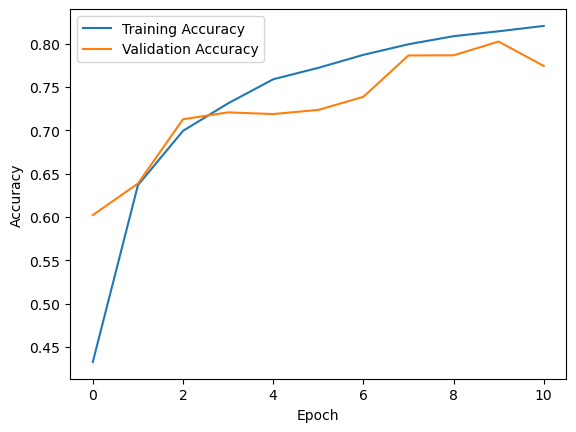

In [3]:
# Created by:
# REVANDO (2070231027)

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

# Define the paths to your datasets
train_dataset_path = "train"
test_dataset_path = "valid"

# Create ImageDataGenerators for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for the test set

# Use flow_from_directory to load images from the training set
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical',
)

# Use flow_from_directory to load images from the test set
test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical',
)

# Build a simple Convolutional Neural Network (CNN) model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the generator for the training set
history = model.fit(train_generator, epochs=11, validation_data=test_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nTest accuracy: {test_acc}')

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
